### Problem Statement
The outcome of the logistic model depends on the probability. Identifying the thereshold value in logistic regression model is always challenging task. As per the rules, threshold value is always selected which error is minimum for a classifier as compared to errors get from the other classifiers. It means we need lowest error to find for better result. This project tries to explain the threshold value which best cutoff by analyzing the ROC and Auc curve on the basis of true positive rate and false positive rate. 
    Higher the tpr, better the model is. I tried to develop different classifiers and test the accuracy score along with confusion matrix and classification report. It also tries to get the best ROC curve to identify the best threshold value to classify the classification problem datasets.

In [1]:
# import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import datasets
df=pd.read_csv('Logit-Simmons.csv')

In [3]:
df.head()

,Customer,Spending,Card,Purchase
0,1,2.291,1,0
1,2,3.215,1,0
2,3,2.135,1,0
3,4,3.924,0,0
4,5,2.528,1,0


In [4]:
df.describe()

,Customer,Spending,Card,Purchase
count,100.000000,100.000000,100.000000,100.000000
mean,50.500000,3.333790,0.500000,0.400000
std,29.011492,1.741298,0.502519,0.492366
min,1.000000,1.058000,0.000000,0.000000
25%,25.750000,2.059000,0.000000,0.000000
50%,50.500000,2.805500,0.500000,0.000000
75%,75.250000,4.468250,1.000000,1.000000
max,100.000000,7.076000,1.000000,1.000000


In [5]:
df['Card'].unique()

array([1, 0], dtype=int64)

In [6]:
df['Purchase'].unique()

array([0, 1], dtype=int64)

In [7]:
df['Purchase'].value_counts()

0    60
1    40
Name: Purchase, dtype: int64

In [8]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [9]:
x=df[['Spending', 'Card']]

In [10]:
y=df['Purchase'].values.reshape(-1,1)

In [11]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, random_state=0)

In [12]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((75, 2), (25, 2), (75, 1), (25, 1))

In [13]:
# buipd a logistic model 
Lreg=LogisticRegression(solver='lbfgs')
Lreg.fit(x_train, y_train.ravel())
# ravel() returns 1D array with all the input-array elements

LogisticRegression()

In [14]:
y_pred=Lreg.predict(x_test)

In [15]:
y_pred

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0], dtype=int64)

In [16]:
y_pred_train=Lreg.predict(x_train)
y_pred_train

array([1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [17]:
# calculate probability of predicting data values
y_prob_train=Lreg.predict_proba(x_train)[:,1]

In [18]:
y_prob_train.reshape(-1,1).T

array([[0.50646483, 0.24709179, 0.31412323, 0.35105713, 0.5140765 ,
        0.41197527, 0.59892628, 0.26552713, 0.30318325, 0.24933228,
        0.22799824, 0.28190041, 0.34744327, 0.22742756, 0.65044832,
        0.41560677, 0.20611914, 0.30018444, 0.21567668, 0.36267507,
        0.55402648, 0.43583458, 0.30318325, 0.17901064, 0.25250395,
        0.31777966, 0.42374703, 0.34509262, 0.52929855, 0.20691679,
        0.26162192, 0.30332038, 0.32265365, 0.22748458, 0.38807052,
        0.33410385, 0.39356624, 0.24152025, 0.47435039, 0.33468167,
        0.69042063, 0.58828012, 0.23236834, 0.57405248, 0.66686171,
        0.54744263, 0.23785377, 0.47881348, 0.52072078, 0.37036008,
        0.22799824, 0.23785377, 0.28315909, 0.31546258, 0.71342869,
        0.19225132, 0.69827154, 0.63645317, 0.29321007, 0.2196553 ,
        0.58307238, 0.30952729, 0.1982679 , 0.53528773, 0.37399968,
        0.35528257, 0.26099553, 0.28170337, 0.47808469, 0.30952729,
        0.35468814, 0.43583458, 0.24283048, 0.40

In [19]:
y_prob_test=Lreg.predict_proba(x_test)[:,1]
y_prob_test.reshape(-1,1).T

array([[0.47792275, 0.67274677, 0.33374297, 0.32763798, 0.43113282,
        0.64258751, 0.18790516, 0.37399968, 0.30154962, 0.30765786,
        0.42914424, 0.55604088, 0.41876283, 0.23312168, 0.60070735,
        0.1796793 , 0.23138577, 0.43390982, 0.46336034, 0.26883103,
        0.17668566, 0.39379862, 0.35104717, 0.34744327, 0.23138577]])

In [20]:
# Now summary for logistic model
import statsmodels.api as sm
x_constant= x1=sm.add_constant(x)
logit_model=sm.Logit(y, x1)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.604869
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  100
Model:                          Logit   Df Residuals:                       97
Method:                           MLE   Df Model:                            2
Date:                Sat, 16 Jan 2021   Pseudo R-squ.:                  0.1012
Time:                        19:47:16   Log-Likelihood:                -60.487
converged:                       True   LL-Null:                       -67.301
Covariance Type:            nonrobust   LLR p-value:                  0.001098
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.1464      0.577     -3.718      0.000      -3.278      -1.015
Spending       0.3416      0.

In [21]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [22]:
score=accuracy_score(y_test, y_pred)

In [23]:
score

0.6

In [24]:
confusion_matrix(y_test, y_pred)

array([[12,  1],
       [ 9,  3]], dtype=int64)

In [25]:
# generating classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.57      0.92      0.71        13
           1       0.75      0.25      0.38        12

    accuracy                           0.60        25
   macro avg       0.66      0.59      0.54        25
weighted avg       0.66      0.60      0.55        25



In [26]:
TN, FP, FN, TP=confusion_matrix(y_test, y_pred).ravel()

In [27]:
print("True Negatives :", TN)
print("False Positives :", FP)
print("False Negatives :", FN)
print("True Positives :", TP)

True Negatives : 12
False Positives : 1
False Negatives : 9
True Positives : 3


In [28]:
# Now calculate the specificity and sensitivity
Specificity =TN/(TN+FP)
Specificity

0.9230769230769231

In [29]:
Sensitivity =TP/(TP+FN)
Sensitivity

0.25

In [30]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

In [31]:
#ROC Curve for trainning datasets
log_ROC_AUC1=roc_auc_score(y_train, y_pred_train)
fpr1, tpr1, thresholds1=roc_curve(y_train, y_prob_train)
roc_auc1=auc(fpr1, tpr1)

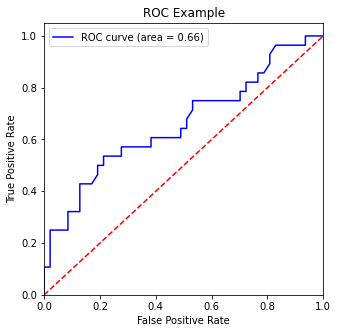

In [32]:
plt.figure(figsize=(5,5))
plt.plot(fpr1, tpr1, color='blue', label='ROC curve (area = %0.2f)' % roc_auc1)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Example')
plt.legend(loc="lower rights")
plt.show()

In [33]:
#ROC Curve for testing datasets
log_ROC_AUC=roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds1=roc_curve(y_test, y_prob_test)
roc_auc1=auc(fpr, tpr)

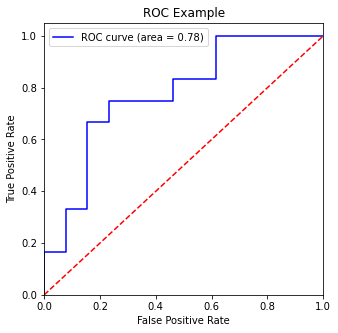

In [34]:
plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc1)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Example')
plt.legend(loc="lower rights")
plt.show()

### Random Forest Classifier

In [35]:
from sklearn.ensemble import RandomForestClassifier

In [36]:
rfc=RandomForestClassifier(n_estimators=100)
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [37]:
y_pred1=rfc.predict(x_test)

In [38]:
rfc_score=rfc.score(x_test, y_test)
rfc_score

0.64

In [39]:
confusion_matrix(y_test, y_pred1)

array([[9, 4],
       [5, 7]], dtype=int64)

In [40]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.64      0.69      0.67        13
           1       0.64      0.58      0.61        12

    accuracy                           0.64        25
   macro avg       0.64      0.64      0.64        25
weighted avg       0.64      0.64      0.64        25



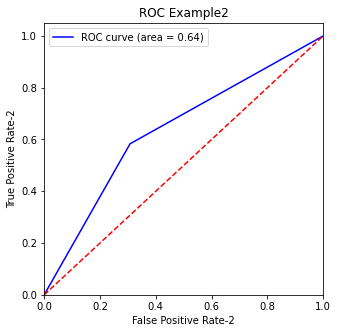

In [41]:
log_ROC_AUC1=roc_auc_score(y_test, y_pred1)
fpr2, tpr2, thresholds2=roc_curve(y_test, y_pred1)
roc_auc2=auc(fpr2, tpr2)
plt.figure(figsize=(5,5))
plt.plot(fpr2, tpr2, color='blue', label='ROC curve (area = %0.2f)' % roc_auc2)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate-2')
plt.ylabel('True Positive Rate-2')
plt.title('ROC Example2')
plt.legend(loc="lower rights")
plt.show()

### Build Gradient Boosting Classifier

In [42]:
from sklearn.ensemble import GradientBoostingClassifier

In [43]:
gbc=GradientBoostingClassifier()
gbc.fit(x_train, y_train)
y_pred2=gbc.predict(x_test)

In [44]:
gbc_score=gbc.score(x_test, y_test)
gbc_score

0.56

In [45]:
confusion_matrix(y_test, y_pred2)

array([[6, 7],
       [4, 8]], dtype=int64)

In [46]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.60      0.46      0.52        13
           1       0.53      0.67      0.59        12

    accuracy                           0.56        25
   macro avg       0.57      0.56      0.56        25
weighted avg       0.57      0.56      0.56        25



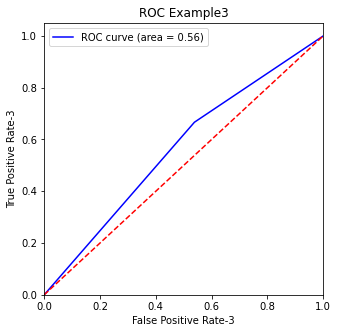

In [47]:
log_ROC_AUC2=roc_auc_score(y_test, y_pred2)
fpr3, tpr3, thresholds3=roc_curve(y_test, y_pred2)
roc_auc3=auc(fpr3, tpr3)
plt.figure(figsize=(5,5))
plt.plot(fpr3, tpr3, color='blue', label='ROC curve (area = %0.2f)' % roc_auc3)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate-3')
plt.ylabel('True Positive Rate-3')
plt.title('ROC Example3')
plt.legend(loc="lower rights")
plt.show()

### SVM classifier

In [48]:
from sklearn.svm import SVC
svc=SVC(kernel='linear')

In [49]:
svc.fit(x_train, y_train)

SVC(kernel='linear')

In [50]:
y_pred3=svc.predict(x_test)

In [51]:
scv_score=svc.score(x_test, y_test)
scv_score

0.6

In [52]:
confusion_matrix(y_test, y_pred3)

array([[12,  1],
       [ 9,  3]], dtype=int64)

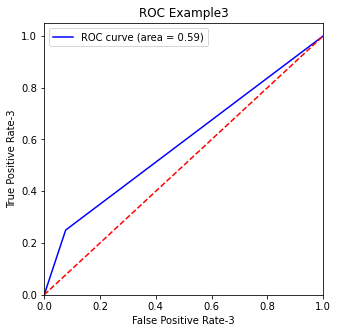

In [53]:
log_ROC_AUC3=roc_auc_score(y_test, y_pred3)
fpr3, tpr3, thresholds3=roc_curve(y_test, y_pred3)
roc_auc3=auc(fpr3, tpr3)
plt.figure(figsize=(5,5))
plt.plot(fpr3, tpr3, color='blue', label='ROC curve (area = %0.2f)' % roc_auc3)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate-3')
plt.ylabel('True Positive Rate-3')
plt.title('ROC Example3')
plt.legend(loc="lower rights")
plt.show()

In [54]:
from sklearn.naive_bayes import GaussianNB
nb_clf= GaussianNB()
nb_clf.fit(x_train, y_train)
y_pred4= nb_clf.predict(x_test)
nb_score=nb_clf.score(x_test, y_test)
nb_score

0.6

In [55]:
confusion_matrix(y_test, y_pred4)

array([[12,  1],
       [ 9,  3]], dtype=int64)

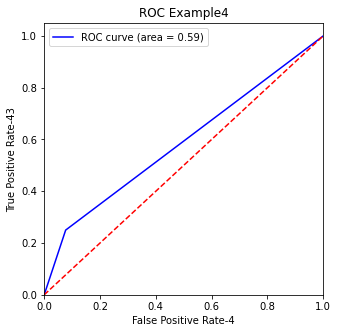

In [56]:
log_ROC_AUC4=roc_auc_score(y_test, y_pred4)
fpr4, tpr4, thresholds4=roc_curve(y_test, y_pred4)
roc_auc4=auc(fpr4, tpr4)
plt.figure(figsize=(5,5))
plt.plot(fpr4, tpr4, color='blue', label='ROC curve (area = %0.2f)' % roc_auc4)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate-4')
plt.ylabel('True Positive Rate-43')
plt.title('ROC Example4')
plt.legend(loc="lower rights")
plt.show()